# This file attempts to perform Social Network Analysis on the a sub-set of the dataset, due to compute constraints.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import random

In [25]:
file_path = "soc-Slashdot0902.txt"
subset_percentage = 0.001
data = []

In [26]:
with open(file_path, 'r') as f:
    # Skip the first 4 lines (header)
    for _ in range(4):
        next(f)

    # Read and process lines, selecting a percentage randomly
    for line in f:
        if random.random() < subset_percentage:
            source, target = map(int, line.strip().split("\t"))
            data.append({"FromNodeId": source, "ToNodeId": target})

## Preprocessing and creation of a NetworkX directed graph

In [27]:
# Convert the list of dictionaries to a pandas DataFrame
data = pd.DataFrame(data)

# Display the first few rows
print(data.head())

   FromNodeId  ToNodeId
0          17      1579
1          21      5035
2          25      5013
3          43      7871
4          49      8298


In [28]:
# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(data, source="FromNodeId", target="ToNodeId", create_using=nx.DiGraph())

## Some Exploratory Data Analysis (EDA) on the graph

In [29]:
# Basic EDA
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 1638
Number of edges: 938


In [30]:
# Degree distributions
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

In [31]:
print(f"Average in-degree: {np.mean(in_degrees):.2f}")
print(f"Average out-degree: {np.mean(out_degrees):.2f}")

Average in-degree: 0.57
Average out-degree: 0.57


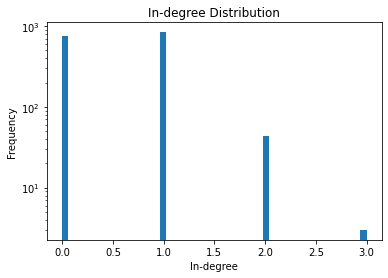

In [32]:
# Plot degree distributions
plt.hist(in_degrees, bins=50, log=True)
plt.title("In-degree Distribution")
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.savefig("in_degree_distribution.png", dpi=300,bbox_inches='tight')
plt.show()

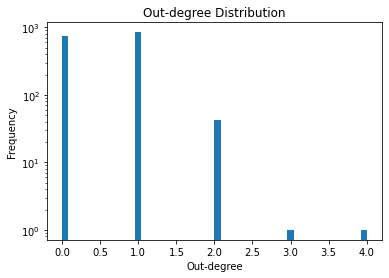

In [33]:
plt.hist(out_degrees, bins=50, log=True)
plt.title("Out-degree Distribution")
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.savefig('out_degree_distribution.png', dpi=300,bbox_inches='tight')
plt.show()

## Detection of communities using the Louvain method

In [34]:
import community as community_louvain
from community import best_partition

In [35]:
undirected_G = G.to_undirected()
partition = community_louvain.best_partition(undirected_G)

In [36]:
# Add community labels as node attributes
nx.set_node_attributes(G, partition, "community")

## Computing centrality measures for the nodes in the graph

In [37]:
degree_centrality = nx.degree_centrality(G)

Disclaimer: the following block of code could get compute intensive, execute with vaution

In [38]:
betweenness_centrality = nx.betweenness_centrality(G)

In [39]:
closeness_centrality = nx.closeness_centrality(G)

In [40]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [41]:
# Add centrality measures as node attributes
nx.set_node_attributes(G, degree_centrality, "degree_centrality")
nx.set_node_attributes(G, betweenness_centrality, "betweenness_centrality")
nx.set_node_attributes(G, closeness_centrality, "closeness_centrality")
nx.set_node_attributes(G, eigenvector_centrality, "eigenvector_centrality")

In [42]:
# Visualize the graph
pos = nx.spring_layout(G, seed=42)
node_color = [partition[node] for node in G.nodes()]


## General Visualization of the graph

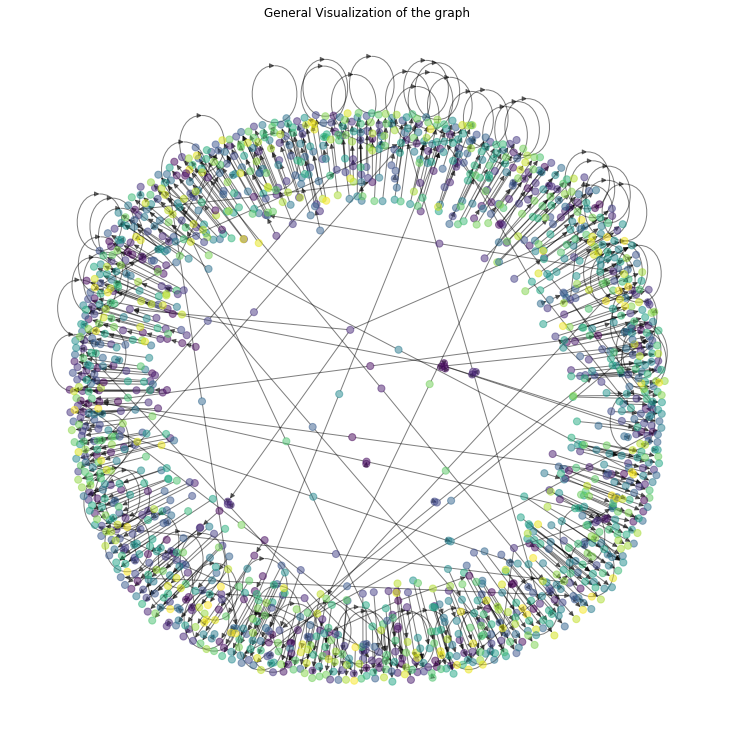

In [43]:

plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=50, node_color=node_color, with_labels=False, alpha=0.5)
plt.title("General Visualization of the graph")
plt.savefig('v-General Visualization of the graph.png', dpi=400, bbox_inches='tight')
plt.show()


## Basic network visualization with node labels

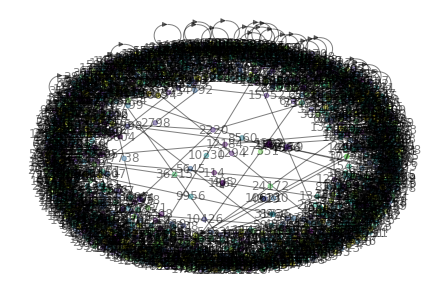

In [44]:
nx.draw(G, pos, node_size=20, node_color=node_color, with_labels=True, alpha=0.5)

## Network visualization with different node sizes based on degree centrality

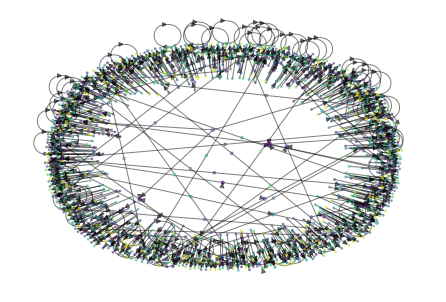

In [45]:
node_size = [degree_centrality[node] * 5000 for node in G.nodes()]
nx.draw(G, pos, node_size=node_size, node_color=node_color, with_labels=False, alpha=0.5)

## Network visualization with different node colors based on betweenness centrality

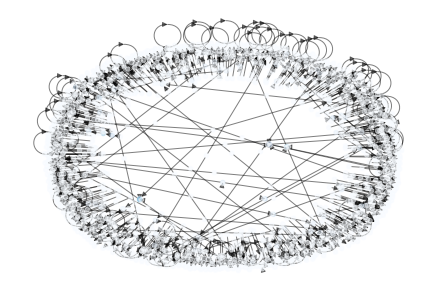

In [46]:
node_color = [betweenness_centrality[node] for node in G.nodes()]
nx.draw(G, pos, node_size=20, node_color=node_color, cmap=plt.cm.Blues, with_labels=False, alpha=0.5)
plt.savefig('v-Network visualization with different node colors based on betweenness centrality.png', dpi=400, bbox_inches='tight')

## Network visualization with different node sizes based on eigenvector centrality

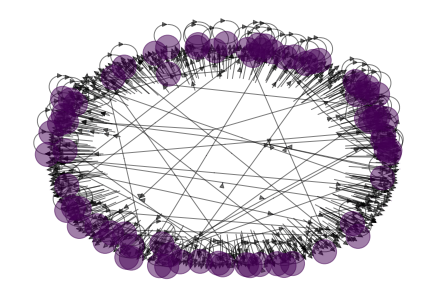

In [47]:
node_size = [eigenvector_centrality[node] * 5000 for node in G.nodes()]
nx.draw(G, pos, node_size=node_size, node_color=node_color, with_labels=False, alpha=0.5)

## Network visualization with different node colors based on closeness centrality

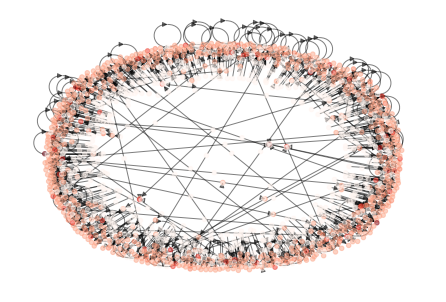

In [48]:
node_color = [closeness_centrality[node] for node in G.nodes()]
nx.draw(G, pos, node_size=20, node_color=node_color, cmap=plt.cm.Reds, with_labels=False, alpha=0.5)

## Network visualization with circular layout

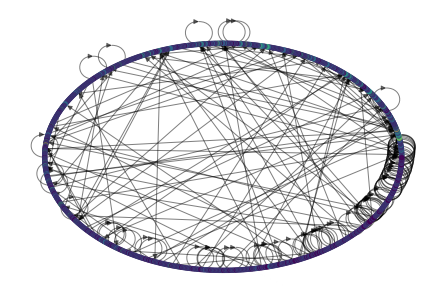

In [49]:
circular_pos = nx.circular_layout(G)
nx.draw(G, circular_pos, node_size=20, node_color=node_color, with_labels=False, alpha=0.5)

## Network visualization with shell layout

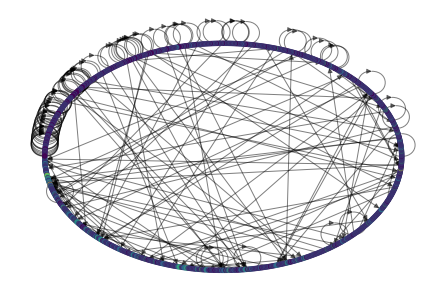

In [50]:
shell_pos = nx.shell_layout(G)
nx.draw(G, shell_pos, node_size=20, node_color=node_color, with_labels=False, alpha=0.5)

## Network visualization with spectral layout

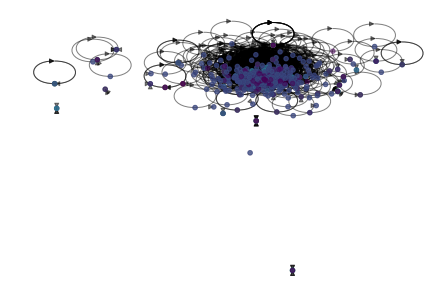

In [51]:
spectral_pos = nx.spectral_layout(G)
nx.draw(G, spectral_pos, node_size=20, node_color=node_color, with_labels=False, alpha=0.5)
plt.savefig('v-Network visualization with spectral layout.png', dpi=400, bbox_inches='tight')

## Histogram of degree centrality values

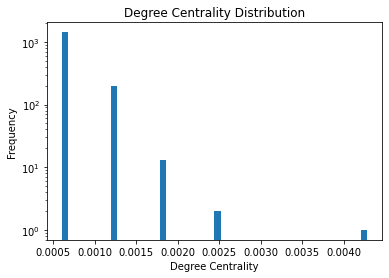

In [52]:
plt.hist(list(degree_centrality.values()), bins=50, log=True)
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.savefig('v-Degree Centrality Distribution.png', dpi=400, bbox_inches='tight')
plt.show()

## Histogram of betweenness centrality values

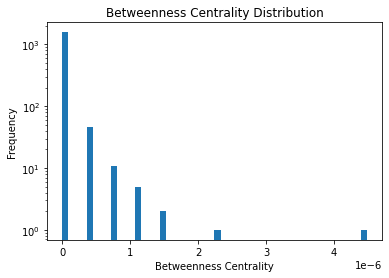

In [53]:
plt.hist(list(betweenness_centrality.values()), bins=50, log=True)
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.savefig('v-Betweenness Centrality Distribution.png', dpi=400, bbox_inches='tight')
plt.show()

## Histogram of closeness centrality values

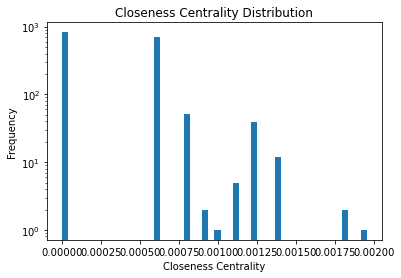

In [54]:
plt.hist(list(closeness_centrality.values()), bins=50, log=True)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")
plt.savefig('v-Closeness Centrality Distribution.png', dpi=400, bbox_inches='tight')
plt.show()

## displays findings

In [55]:
# Display the number of nodes and edges in the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 1638
Number of edges: 938


In [56]:
# Display the average in-degree and out-degree
print(f"Average in-degree: {np.mean(in_degrees):.2f}")
print(f"Average out-degree: {np.mean(out_degrees):.2f}")

Average in-degree: 0.57
Average out-degree: 0.57


In [57]:
# Calculate and display the number of communities detected by the Louvain method
num_communities = len(set(partition.values()))
print(f"Number of communities detected: {num_communities}")

Number of communities detected: 774


In [58]:
# Display the top N nodes for each centrality measure
N = 10
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

In [59]:
print(f"\nTop {N} nodes by degree centrality:")
for node, value in sorted_degree_centrality[:N]:
    print(f"Node {node}: {value:.4f}")

print(f"\nTop {N} nodes by betweenness centrality:")
for node, value in sorted_betweenness_centrality[:N]:
    print(f"Node {node}: {value:.4f}")

print(f"\nTop {N} nodes by closeness centrality:")
for node, value in sorted_closeness_centrality[:N]:
    print(f"Node {node}: {value:.4f}")

print(f"\nTop {N} nodes by eigenvector centrality:")
for node, value in sorted_eigenvector_centrality[:N]:
    print(f"Node {node}: {value:.4f}")


Top 10 nodes by degree centrality:
Node 398: 0.0043
Node 1884: 0.0024
Node 4805: 0.0024
Node 5013: 0.0018
Node 405: 0.0018
Node 408: 0.0018
Node 4884: 0.0018
Node 2220: 0.0018
Node 2483: 0.0018
Node 2494: 0.0018

Top 10 nodes by betweenness centrality:
Node 398: 0.0000
Node 4805: 0.0000
Node 4448: 0.0000
Node 1884: 0.0000
Node 5013: 0.0000
Node 381: 0.0000
Node 6154: 0.0000
Node 3161: 0.0000
Node 4829: 0.0000
Node 88: 0.0000

Top 10 nodes by closeness centrality:
Node 408: 0.0020
Node 398: 0.0018
Node 4973: 0.0018
Node 521: 0.0014
Node 658: 0.0014
Node 1786: 0.0014
Node 2108: 0.0014
Node 4964: 0.0014
Node 5013: 0.0014
Node 154: 0.0014

Top 10 nodes by eigenvector centrality:
Node 1312: 0.1155
Node 5083: 0.1155
Node 5127: 0.1155
Node 5481: 0.1155
Node 7383: 0.1155
Node 7963: 0.1155
Node 11441: 0.1155
Node 12690: 0.1155
Node 13338: 0.1155
Node 14775: 0.1155
